# Versão 12.10.2023

Carregando alunos...
Alunos carregados.
Iniciando atualização do banco de dados...
RA: 269003, Estado: Falta
RA: 262774, Estado: Falta
RA: 210476, Estado: Falta
RA: 256801, Estado: Falta
RA: 256846, Estado: Presente
RA: 226548, Estado: Falta
RA: 267895, Estado: Falta
RA: 287956, Estado: Presente
RA: 298745, Estado: Falta
RA: 245698, Estado: Falta
RA: 234198, Estado: Falta
RA: 279856, Estado: Falta
RA: 274562, Estado: Falta
RA: 226597, Estado: Falta
RA: 216398, Estado: Falta
Atualização do banco de dados concluída.
Carregando alunos...
Alunos carregados.
Iniciando atualização do banco de dados...
RA: 269003, Estado: Falta
RA: 262774, Estado: Falta
RA: 210476, Estado: Presente
RA: 256801, Estado: Falta
RA: 256846, Estado: Presente
RA: 226548, Estado: Falta
RA: 267895, Estado: Falta
RA: 287956, Estado: Falta
RA: 298745, Estado: Falta
RA: 245698, Estado: Falta
RA: 234198, Estado: Falta
RA: 279856, Estado: Falta
RA: 274562, Estado: Falta
RA: 226597, Estado: Falta
RA: 216398, Estado: Present

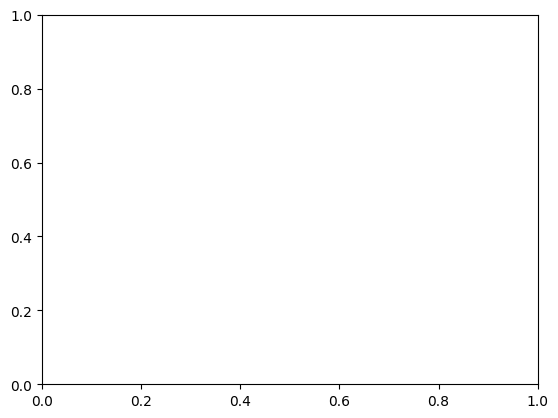

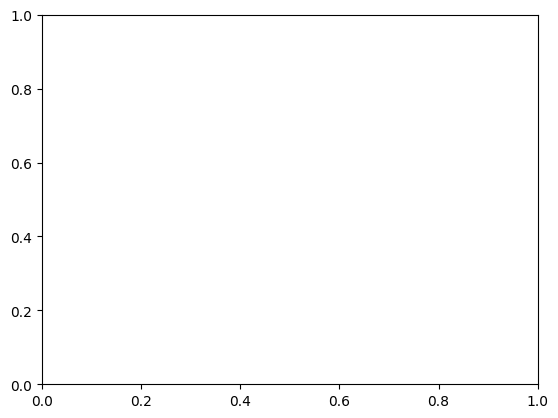

In [11]:
import os
import cv2
import pickle
import tkinter as tk
from tkinter import messagebox, filedialog
from PIL import Image, ImageTk
import face_recognition
from sklearn import svm
import time
import matplotlib.pyplot as plt
from tkinter import ttk
import datetime
import sqlite3
import threading

class ReconhecimentoFacialApp:
    def __init__(self, root):
        self.root = root
        self.frame_botoes = None
                
        self.root.title("FACELI")

        self.centralizar_janela()
        self.root.configure(bg="black")
        self.criar_widgets()

    def centralizar_janela(self):
        window_width = 800  # Largura da janela
        window_height = 600  # Altura da janela
        screen_width = self.root.winfo_screenwidth()  # Largura da tela
        screen_height = self.root.winfo_screenheight()  # Altura da tela

        x = (screen_width - window_width) // 2  # Calcula a posição X para centralizar
        y = (screen_height - window_height) // 2  # Calcula a posição Y para centralizar

        self.root.geometry(f"{window_width}x{window_height}+{x}+{y}")  # Define a geometria da janela

    def criar_widgets(self):
        self.criar_frame_titulo()
        self.criar_frame_botoes()
   
    def criar_frame_titulo(self):
        self.frame_titulo = tk.Frame(self.root, bg="black")
        self.frame_titulo.pack(pady=20)

        self.label_titulo = tk.Label(self.frame_titulo, text="Controle de Frequência com Reconhecimento Facial", font=("Helvetica", 20), bg="black", fg="white")
        self.label_titulo.pack()

    def criar_frame_botoes(self):
        self.frame_botoes = tk.Frame(self.root, bg="black")  # Defina a variável frame_botoes
        self.frame_botoes.pack(pady=50, fill="both", expand=True)

        self.botao_reconhecimento_facial = tk.Button(self.frame_botoes, text="Reconhecimento Facial", font=("Helvetica", 18), command=self.abrir_aba_reconhecimento_facial, bg="aquamarine", fg="black", width=20)
        self.botao_reconhecimento_facial.pack(pady=10)

        self.botao_registro_frequencia = tk.Button(self.frame_botoes, text="Registro de Frequência", font=("Helvetica", 18), command=self.abrir_aba_registro_frequencia, bg="aquamarine", fg="black", width=20)
        self.botao_registro_frequencia.pack(pady=10)

    def abrir_aba_reconhecimento_facial(self):
        # Crie uma nova janela (aba) para o reconhecimento facial
        self.reconhecimento_facial_janela = tk.Toplevel(self.root)
        self.reconhecimento_facial_janela.title("Treinamento Classificador")

        # Centralize a nova janela de reconhecimento facial
        self.centralizar_janela()

        # Crie uma instância da classe ReconhecimentoFacial para a nova janela
        reconhecimento_facial_app = ReconhecimentoFacial(self.reconhecimento_facial_janela)

        # Minimize a janela principal (aqui você pode escolher como deseja lidar com a janela principal)
        self.root.iconify()


    def abrir_aba_registro_frequencia(self):
        # Crie uma nova janela (aba) para o registro de frequência
        self.registro_frequencia_janela = tk.Toplevel(self.root)
        self.registro_frequencia_janela.title("Lista de Frequência")

        # Centralize a nova janela de registro de frequência
        self.centralizar_janela()

        # Crie uma instância da classe RegistroFrequencia para a nova janela
        registro_frequencia_app = RegistroFrequencia(self.registro_frequencia_janela)

        # Minimize a janela principal (aqui você pode escolher como deseja lidar com a janela principal)
        self.root.iconify()


class ReconhecimentoFacial:
    
    def __init__(self, root):
        self.root = root
        self.root.title("FACELI")

        self.centralizar_janela()
        self.root.configure(bg="black")
        self.criar_widgets()
        
        self.acuracia_data = []
        self.fig, self.ax = plt.subplots()

    def centralizar_janela(self):
        window_width = 800  # Largura da janela
        window_height = 600  # Altura da janela
        screen_width = self.root.winfo_screenwidth()  # Largura da tela
        screen_height = self.root.winfo_screenheight()  # Altura da tela

        x = (screen_width - window_width) // 2  # Calcula a posição X para centralizar
        y = (screen_height - window_height) // 2  # Calcula a posição Y para centralizar

        self.root.geometry(f"{window_width}x{window_height}+{x}+{y}")  # Define a geometria da janela

    def criar_widgets(self):
        self.criar_frame_titulo()
        self.criar_frame_botoes()
        self.criar_frame_resultado()
        self.fig, self.ax = plt.subplots()

    def criar_frame_titulo(self):
        self.frame_titulo = tk.Frame(self.root, bg="black")
        self.frame_titulo.pack(pady=20)

        self.label_titulo = tk.Label(self.frame_titulo, text="Treinamento Classificador", font=("Helvetica", 20), bg="black", fg="white")
        self.label_titulo.pack()

    def criar_frame_botoes(self):
        frame_botoes = tk.Frame(self.root, bg="black")
        frame_botoes.pack()

        self.botao_treinamento = tk.Button(frame_botoes, text="Treinamento", font=("Helvetica", 18), command=self.realizar_treinamento, bg="aquamarine", fg="black")
        self.botao_treinamento.pack(side=tk.LEFT, padx=10)

        self.botao_validacao_teste = tk.Button(frame_botoes, text="Validação/Teste", font=("Helvetica", 18), command=self.realizar_validacao_teste, bg="aquamarine", fg="black")
        self.botao_validacao_teste.pack(side=tk.LEFT, padx=10)

    def criar_frame_resultado(self):
        self.frame_resultado = tk.Frame(self.root, bg="black", highlightbackground="aquamarine", highlightthickness=2)
        self.frame_resultado.pack(pady=20)

        self.label_imagem_validacao = tk.Label(self.frame_resultado, bg="black", padx=10, pady=10)
        self.label_imagem_validacao.pack()

        self.label_mensagem_reconhecimento = tk.Label(self.frame_resultado, text="", bg="black", fg="white", font=("Helvetica", 16))
        self.label_mensagem_reconhecimento.pack()

        self.frame_icones = tk.Frame(self.frame_resultado, bg="black")
        self.frame_icones.pack(pady=10)


    def realizar_treinamento(self):
        self.botao_treinamento.config(state=tk.DISABLED)
        self.botao_validacao_teste.config(state=tk.DISABLED)

        print("Iniciando treinamento...")

        start_time = time.time()

        dataset_path = "src/YaleFaces"
        yale_encodings = []
        yale_labels = []
        imagens_treinadas = 0
        total_imagens = 0
        imagens_com_erro = []

        for subject_folder in os.listdir(dataset_path):
            subject_folder_path = os.path.join(dataset_path, subject_folder)
            if os.path.isdir(subject_folder_path):
                image_count = 0
                for img_name in os.listdir(subject_folder_path):
                    if img_name.endswith(".gif"):
                        image_count += 1
                        if image_count <= 7:
                            total_imagens += 1
                            identity = subject_folder
                            image = face_recognition.load_image_file(os.path.join(subject_folder_path, img_name))
                            encodings = face_recognition.face_encodings(image)
                            if encodings:
                                encoding = encodings[0]
                                yale_encodings.append(encoding)
                                yale_labels.append(identity)
                                imagens_treinadas += 1
                                print(f"Face cadastrada: {identity}")
                            else:
                                imagens_com_erro.append(os.path.join(subject_folder_path, img_name))
                                print(f"Erro na imagem: {os.path.join(subject_folder_path, img_name)}")
                            face_landmarks = face_recognition.face_landmarks(image)
                            #print(f"Landmarks da face: {face_landmarks}")

        end_time = time.time()

        if not yale_encodings:
            messagebox.showerror("Erro de Treinamento", "Pelo menos duas identidades diferentes são necessárias para treinamento.")
            self.botao_treinamento.config(state=tk.NORMAL)
            self.botao_validacao_teste.config(state=tk.NORMAL)
            return

        svm_classifier = svm.SVC(kernel='linear', probability=True)
        svm_classifier.fit(yale_encodings, yale_labels)

        with open("modelo_classificador.pkl", "wb") as f:
            pickle.dump(svm_classifier, f)

        elapsed_time = end_time - start_time

        acuracia = imagens_treinadas / total_imagens
        print(f"Treinamento concluído em {elapsed_time:.2f} segundos.")
        print(f"Total de imagens percorridas: {total_imagens}")
        print(f"Imagens treinadas com sucesso: {imagens_treinadas}")
        print(f"Acurácia: {acuracia:.4f}")

        self.acuracia_data.append(acuracia)
        self.plot_acuracia()

        if imagens_com_erro:
            print("Imagens com erro:")
            for img_path in imagens_com_erro:
                print(img_path)

        messagebox.showinfo("Treinamento Concluído", "O treinamento foi concluído e o modelo foi salvo.")
        self.botao_treinamento.config(state=tk.NORMAL)
        self.botao_validacao_teste.config(state=tk.NORMAL)

    def realizar_validacao_teste(self):
        image_path = filedialog.askopenfilename(title="Selecionar Imagem", filetypes=[("Imagens", "*.gif")])
        if image_path:
            # Remova o frame de ícones existente e crie um novo
            self.frame_icones.destroy()
            self.frame_icones = tk.Frame(self.frame_resultado, bg="black")
            self.frame_icones.pack()
            self.validar_reconhecimento(image_path)

    def validar_reconhecimento(self, image_path):
        if not os.path.exists("modelo_classificador.pkl"):
            messagebox.showerror("Erro", "Modelo não treinado. Realize o treinamento antes de fazer a validação/teste.")
            return

        with open("modelo_classificador.pkl", "rb") as f:
            svm_classifier = pickle.load(f)

        image = face_recognition.load_image_file(image_path)
        face_locations = face_recognition.face_locations(image)
        face_encodings = face_recognition.face_encodings(image, face_locations)

        if not face_encodings:
            self.label_mensagem_reconhecimento.config(text="Pessoa não reconhecida")
            self.mostrar_icone_x()
            return

        predicted_labels = []
        for face_encoding in face_encodings:
            _label = svm_classifier.predict([face_encoding])
            predicted_labels.append(_label[0])

        img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(img_rgb)
        img_tk = ImageTk.PhotoImage(img_pil)
        self.label_imagem_validacao.config(image=img_tk)
        self.label_imagem_validacao.image = img_tk

        predicted_names = ", ".join(predicted_labels)
        if predicted_names:
            self.label_mensagem_reconhecimento.config(text=f"Pessoa Reconhecida: {predicted_names}")
            self.mostrar_icone_verificado()
        else:
            self.label_mensagem_reconhecimento.config(text="Pessoa não reconhecida")
            self.mostrar_icone_x()

        self.mostrar_resultado_reconhecimento(predicted_names)

    def mostrar_resultado_reconhecimento(self, predicted_names):
        self.frame_icones.destroy()  # Remover o frame existente

        self.frame_icones = tk.Frame(self.frame_resultado, bg="black")
        self.frame_icones.pack(pady=10)

        if predicted_names:
            self.mostrar_icone_verificado()
        else:
            self.mostrar_icone_x()

    def mostrar_icone_verificado(self):
        icone_verificado = Image.open("icone_verificado.png")
        icone_verificado = icone_verificado.resize((100, 100))
        icone_verificado = ImageTk.PhotoImage(icone_verificado)
        label_icone = tk.Label(self.frame_icones, image=icone_verificado, bg="black")
        label_icone.image = icone_verificado
        label_icone.pack()

    def mostrar_icone_x(self):
        # Crie e mostre o ícone "X"
        icone_x = Image.open("icone_x.png")
        icone_x = icone_x.resize((100, 100))
        icone_x = ImageTk.PhotoImage(icone_x)
        label_icone = tk.Label(self.frame_icones, image=icone_x, bg="black")
        label_icone.image = icone_x
        label_icone.pack()

    def plot_acuracia(self):
        self.ax.clear()
        self.ax.set_xlabel("Treinamento")
        self.ax.set_ylabel("Acurácia")

        # Ajuste o tamanho da figura
        self.fig.set_size_inches(10, 6)

        # Personalize o intervalo do eixo x (por exemplo, de 0 a 100)
        self.ax.set_xlim(0, len(self.acuracia_data) + 1)
        self.ax.set_xticks(range(0, len(self.acuracia_data) + 1, 10))  

        self.ax.plot(range(1, len(self.acuracia_data) + 1), self.acuracia_data, marker='o')
        self.ax.set_ylim([0, 1])
        self.ax.grid(True)
        self.fig.canvas.draw()
    
        plt.show()

class RegistroFrequencia:
    def __init__(self, root):
        self.root = root
        self.root.title("FACELI")
        
        self.tree = None
        self.hora_inicio = None
        self.hora_termino = None
        self.label_hora_inicio = None
        self.label_hora_termino = None
        self.frequencia_iniciada = False
        self.frequencia_finalizada = False
        
        self.label_mensagem_reconhecimento = tk.Label(self.root, text="", font=("Helvetica", 12), bg="black", fg="white")
        self.label_mensagem_reconhecimento.pack()

        self.frame_resultado = tk.Frame(self.root, bg="black")
        self.frame_resultado.pack(pady=20)
        
        self.frame_lista_alunos = tk.Frame(self.root, bg="black", bd=5, relief=tk.SUNKEN)
        
        self.centralizar_janela()
        self.root.configure(bg="black")
        self.criar_widgets()
        
        self.criar_frame_lista_alunos()
        
        self.conexao = sqlite3.connect("registro_frequencia.db")
        self.cursor = self.conexao.cursor()

    def centralizar_janela(self):
        screen_width = self.root.winfo_screenwidth()
        screen_height = self.root.winfo_screenheight()

        window_width = 1000
        window_height = 800

        x = (screen_width - window_width) // 2
        y = (screen_height - window_height) // 2

        self.root.geometry(f"{window_width}x{window_height}+{x}+{y}")

    def criar_widgets(self):
        self.criar_frame_titulo()
        self.criar_frame_botoes()
        self.criar_frame_lista_alunos()

    def criar_frame_titulo(self):
        self.frame_titulo = tk.Frame(self.root, bg="black")
        self.frame_titulo.pack(pady=20)

        self.label_titulo = tk.Label(self.frame_titulo, text="Lista de Frequência", font=("Helvetica", 20), bg="black", fg="white", justify="center", wraplength=600)
        self.label_titulo.pack()

    def criar_frame_botoes(self):
        frame_botoes = tk.Frame(self.root, bg="black")
        frame_botoes.pack()
        
        self.botao_iniciar_frequencia = tk.Button(frame_botoes, text="Iniciar Frequência", font=("Helvetica", 18), command=self.iniciar_frequencia, bg="aquamarine", fg="black")
        self.botao_iniciar_frequencia.pack(side=tk.LEFT, padx=10)
        if self.frequencia_iniciada:
            self.botao_iniciar_frequencia.config(state=tk.DISABLED)
        
        self.botao_capturar_foto = tk.Button(frame_botoes, text="Capturar Foto", font=("Helvetica", 18), command=self.capturar_foto, bg="aquamarine", fg="black")
        self.botao_capturar_foto.pack(side=tk.LEFT, padx=10)
        
        self.botao_finalizar_frequencia = tk.Button(frame_botoes, text="Finalizar Frequência", font=("Helvetica", 18), command=self.finalizar_frequencia, bg="aquamarine", fg="black")
        self.botao_finalizar_frequencia.pack(side=tk.LEFT, padx=10)

    def criar_frame_lista_alunos(self):
        if self.tree is None:
            frame_lista_alunos = tk.Frame(self.root, bg="black", bd=5, relief=tk.SUNKEN)
            frame_lista_alunos.pack(padx=30, pady=30, fill="both", expand=True)

            self.tree = ttk.Treeview(frame_lista_alunos, columns=("RA", "Nome", "Status"), selectmode="browse", height=15)
            self.tree.heading("#1", text="RA")
            self.tree.heading("#2", text="Nome")
            self.tree.heading("#3", text="Status")
            self.tree.column("#1", width=100)
            self.tree.column("#2", width=300)
            self.tree.column("#3", width=100)
            self.tree["show"] = "headings"  # Ocultar a coluna vazia
            self.tree.pack(fill="both", expand=True)
            
            style = ttk.Style()
            style.configure("Treeview.Heading", font=("Helvetica", 14), foreground="black", background="black")
            style.configure("Treeview", font=("Helvetica", 12), foreground="white", background="black")
            style.layout("Treeview", [('Treeview.treearea', {'sticky': 'nswe'})])

    def iniciar_frequencia(self):
        if self.frequencia_iniciada:
            messagebox.showwarning("Aviso", "A frequência já foi iniciada.")
            return

        self.frequencia_iniciada = True
        self.hora_inicio = datetime.datetime.now()
        hora_inicio_str = self.hora_inicio.strftime("%H:%M:%S")
        self.label_hora_inicio = tk.Label(self.root, text=f"Frequência iniciada às {hora_inicio_str}", font=("Helvetica", 12), bg="black", fg="white")
        self.label_hora_inicio.pack(pady=2)
        
        self.botao_iniciar_frequencia.config(state="disabled")
        self.botao_finalizar_frequencia.config(state="active")
        self.carregar_alunos()

    def finalizar_frequencia(self):
        if not self.frequencia_iniciada:
            messagebox.showwarning("Aviso", "A frequência não foi iniciada ainda. Inicie a frequência antes de finalizá-la.")
            return

        self.frequencia_iniciada = False
        self.botao_iniciar_frequencia.config(state="active")
        self.botao_finalizar_frequencia.config(state="disabled")
        self.atualizar_frequencia_no_banco()
        self.limpar_frame_lista_alunos()

        # Exibe uma mensagem de sucesso
        messagebox.showinfo("Sucesso", "A frequência foi finalizada com sucesso.")

    def limpar_frame_lista_alunos(self):
        for item in self.tree.get_children():
            self.tree.delete(item)
        
    def atualizar_tabela_frequencia(self, nome_sujeito):
        for item in self.tree.get_children():
            values = self.tree.item(item, 'values')
            nome = values[1]

            if nome == nome_sujeito:
                self.tree.item(item, values=(values[0], values[1], "Presente"))
                self.tree.selection_set(item)
    

    def atualizar_frequencia_no_banco(self):
        print("Iniciando atualização do banco de dados...")
        conexao = sqlite3.connect("registro_frequencia.db")
        cursor = conexao.cursor()
        
        # Verifica se há itens na Treeview
        if not self.tree.get_children():
            print("Nenhum item na Treeview")
            conexao.close()
            return

        for item in self.tree.get_children():
            values = self.tree.item(item, 'values')
            ra = values[0]
            estado = values[2]

            print(f"RA: {ra}, Estado: {estado}")

            cursor.execute("SELECT id FROM Frequencia WHERE idAluno = (SELECT id FROM Aluno WHERE ra = ?)", (ra,))
            resultado = cursor.fetchone()

            if resultado is None:
                cursor.execute("INSERT INTO Frequencia (idAluno, QtdFreq) VALUES ((SELECT id FROM Aluno WHERE ra = ?), 0)", (ra,))
            elif estado == "Presente":
                cursor.execute("UPDATE Frequencia SET QtdFreq = QtdFreq + 1 WHERE idAluno = (SELECT id FROM Aluno WHERE ra = ?)", (ra,))

            if estado != "Presente":
                id_aluno = cursor.execute("SELECT id FROM Aluno WHERE ra = ?", (ra,)).fetchone()[0]
                data_ausencia = datetime.datetime.now().strftime("%Y-%m-%d")
                cursor.execute("INSERT INTO AusenciaData (idAluno, dataAusencia) VALUES (?, ?)", (id_aluno, data_ausencia))

        conexao.commit()
        conexao.close()
        print("Atualização do banco de dados concluída.")

    def exibir_validacao(self, image_path):
        window_validacao = tk.Toplevel(self.root)
        window_validacao.title("Validação de Reconhecimento")

        window_validacao.geometry("+%d+%d" % ((self.root.winfo_screenwidth() - window_validacao.winfo_reqwidth()) / 2,
                                               (self.root.winfo_screenheight() - window_validacao.winfo_reqheight()) / 2))

        img = Image.open(image_path)
        img = img.resize((200, 200))
        img_tk = ImageTk.PhotoImage(img)
        label_imagem = tk.Label(window_validacao, image=img_tk)
        label_imagem.image = img_tk
        label_imagem.pack()

        nome_sujeito = self.realizar_reconhecimento(image_path)

        label_nome = tk.Label(window_validacao, text=f"Nome do Sujeito: {nome_sujeito}", font=("Helvetica", 16))
        label_nome.pack()

        if nome_sujeito:
            self.atualizar_tabela_frequencia(nome_sujeito)

        self.fechar_janela_apos_tempo(window_validacao, 3)

    def realizar_reconhecimento(self, image_path):
        if not os.path.exists("modelo_classificador.pkl"):
            messagebox.showerror("Erro", "Modelo não treinado. Realize o treinamento antes de fazer a validação/teste.")
            return

        with open("modelo_classificador.pkl", "rb") as f:
            svm_classifier = pickle.load(f)

        image = face_recognition.load_image_file(image_path)
        face_locations = face_recognition.face_locations(image)
        face_encodings = face_recognition.face_encodings(image, face_locations)

        if not face_encodings:
            messagebox.showinfo("Resultado", "Pessoa não reconhecida")
            return

        predicted_labels = []
        for face_encoding in face_encodings:
            _label = svm_classifier.predict([face_encoding])
            predicted_labels.append(_label[0])

        predicted_names = ", ".join(predicted_labels)

        if predicted_names:
            self.label_mensagem_reconhecimento.config(text=f"Pessoa Reconhecida: {predicted_names}")
            return predicted_names
        else:
            messagebox.showinfo("Resultado", "Pessoa não reconhecida")
            return None

    def capturar_foto(self):
        if not self.frequencia_iniciada:
            messagebox.showwarning("Aviso", "A frequência não foi iniciada. Inicie a frequência antes de capturar uma foto.")
            return

        image_path = filedialog.askopenfilename(title="Selecionar Imagem", filetypes=[("Imagens", "*.gif")])

        if image_path:
            self.exibir_validacao(image_path)

    def fechar_janela_apos_tempo(self, window, tempo_segundos):
        def fechar_janela():
            window.after(tempo_segundos * 1000, window.destroy)
        thread = threading.Thread(target=fechar_janela)
        thread.start()

    def carregar_alunos(self):
        print("Carregando alunos...")  # Mensagem de depuração
        if self.tree is not None:
            for item in self.tree.get_children():
                self.tree.delete(item)

            query = "SELECT ra, nome FROM Aluno"
            self.cursor.execute(query)
            alunos = self.cursor.fetchall()

            for aluno in alunos:
                ra, nome = aluno
                self.tree.insert("", "end", values=(ra, nome, "Falta"))

        print("Alunos carregados.")  # Mensagem de depuração

                
if __name__ == "__main__":
    root = tk.Tk()
    app = ReconhecimentoFacialApp(root)
    root.mainloop()
